In [11]:
import os
import numpy as np
import pandas as pd
#Viz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn import metrics
# to make this notebook's output stable across runs
np.random.seed(42)

### MNIST:

C'est le **Hello World** du machine learning

In [5]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [6]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Les données MNIST sont déja partagés entre un jeu d'entrainement (les 60000 premiers) et de test(les 10000 restants)

In [7]:
from math import sqrt
sqrt(784)

28.0

Chaque image fait 28x28 pixels. L’objectif est de prédire le chiffre que chaque image contient.
Nous traiterons chaque image (de dimension 28x28) comme un vecteur de caractéristiques aplati de longueur 784

In [8]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Les manuscrits correspondants aux chiffres sont rangés dans l'ordre, il vaut mieux melanger les données du jeu d'entrainement pr les raisons suivantes:
* Assurer de l'hemoginiété au cours de la validations (s'assurer à chaque passe qu'il ne manques pas qqes chiffres)
* Certains algorithmes de ML sont sensibles à l'ordre des observations d'entrainement

In [9]:
# set X_train indexes : [0-len(X_train)-1]
l = np.arange(len(X_train))
#randomly shuffle X_train indexes
np.random.shuffle(l)
#shuffle X_train and y_train entries
X_train, y_train = X_train[l], y_train[l]

### Classificateur SVM:
On va effectuer un SVM linéraire et le faire entrainer sur le jeu d'entraiment, ensuite on va le tester sur le jeu de test et calculer la précision sans appliquer aucune réduction

In [12]:
#SVM CLassifier
model = LinearSVC()
#entrainer le modele
model.fit(X_train, y_train)
# calculer la précision de base a partir du jeu de test
baseline_accuracy = metrics.accuracy_score(model.predict(X_test), y_test)
baseline_accuracy

0.8198

In [22]:

# on va effectuer 5 projection 
projection_sizes = np.int32(np.linspace(20, 784, 5))
#pour chaque random projection on va calculer la précision du modèle suite à la réduction
accuracies=[]

# iterer sur les projection sizes
for size in projection_sizes:
    #creer une random projection de taille 'size'
    rp = SparseRandomProjection(n_components = size)
    #appliquer la projection sur le jeu d'entrainement 
    X = rp.fit_transform(X_train)
 
    # entrainer un classificateur svm sur le jeu d'entrainement réduit
    model = LinearSVC()
    model.fit(X, y_train)
 
    #appliquer la projection sur le jeu de test 
    test = rp.transform(X_test)
    # evaluer le modele sur le jeu de test reduit et mettre à jour la liste 'accuracies'
    accuracies.append(metrics.accuracy_score(model.predict(test), y_test))

In [23]:
accuracies

[0.5007, 0.8634, 0.8813, 0.7922, 0.8829]

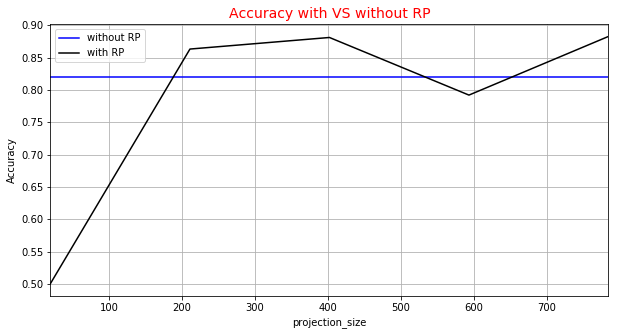

In [34]:
x = projection_sizes
plt.figure(figsize=(10,5))
plt.xlim([20,784])
y1 = [baseline_accuracy]*len(x)
y2 = accuracies
plt.plot(x,y1, 'b-', label="without RP")
plt.plot(x, y2, 'k', label="with RP")
plt.legend()
plt.grid(True)
plt.xlabel('projection_size')
plt.ylabel('Accuracy')
plt.title('Accuracy with VS without RP', color = 'red', fontsize=14)
plt.show()